# Analyse du stock Meta

Dans cette analyse, je vais examiner le comportement de l'action de Meta Platforms, Inc. (META) en effectuant une étude de normalité, de stationnarité, et d'autocorrélation.

<p align="center">Réalisé par Maria Aboulaala</p>

____________________________________________________________________________________________________________________________________________

Avant d'entamer les tests, j'utilise le package yfinance pour télécharger les données du stock Meta, ainsi que les packages pandas et numpy pour effectuer les calculs nécessaires. Ces bibliothèques sont essentielles pour la collecte, la manipulation et l'analyse des données financières, ce qui me permettra d'effectuer les tests.

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np


### Télécharger les données journalières de Meta de 2019 a 2023

In [3]:
META_SYMBOLE = "META"
data = yf.download(META_SYMBOLE, start="2019-01-01", end="2021-12-31")
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,128.990005,137.509995,128.559998,135.679993,135.679993,28146200
2019-01-03,134.690002,137.169998,131.119995,131.740005,131.740005,22717900
2019-01-04,134.009995,138.000000,133.750000,137.949997,137.949997,29002100
2019-01-07,137.559998,138.869995,135.910004,138.050003,138.050003,20089300
2019-01-08,139.889999,143.139999,139.539993,142.529999,142.529999,26263800


Je choisit le prix ajusté en clôture "Adj Close"

In [4]:
prix = data["Adj Close"]

# Graphique des prix

In [10]:
import plotly.express as px

fig = px.line(data, x=data.index, y="Adj Close", title=f"Prix de {META_SYMBOLE}")
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Prix")
fig.show()

c:\Users\maria\Documents\GitHub\Meta_analysis\.venv\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


# Graphique des rendements


Calcule des rendements (variation des prix)

In [8]:
returns = prix.pct_change().dropna()
returns.head()

Date
2019-01-03   -0.029039
2019-01-04    0.047138
2019-01-07    0.000725
2019-01-08    0.032452
2019-01-09    0.011927
Name: Adj Close, dtype: float64

In [11]:
fig = px.line(returns, x=returns.index, y=returns, title=f"Rendements de {META_SYMBOLE}")
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Rendements")
fig.show()

c:\Users\maria\Documents\GitHub\Meta_analysis\.venv\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# Test de stationnarité (test de Dickey-Fuller augmenté)
Les hypothèses de test de Dickey-Fuller augmenté (ADF) sont les suivantes :

- **Hypothèse nulle (H0) :** La série temporelle possède une racine unitaire, ce qui signifie qu'elle n'est pas stationnaire.

- **Hypothèse alternative (H1) :** La série temporelle ne possède pas de racine unitaire, ce qui signifie qu'elle est stationnaire.

Le test ADF vise à évaluer si la série temporelle est stationnaire ou non. Pour effectuer ce test en Python, j'utilise la fonction `adfuller` de la bibliothèque `statsmodels.tsa.stattools`. Cette fonction me permet de tester la stationnarité de la série temporelle et d'obtenir les résultats du test.



In [12]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(returns)
print("Test de stationnarité (Dickey-Fuller Augmenté):")
print(f"Statistique de test : {result[0]}")
print(f"Valeur critique à 1% : {result[4]['1%']}")
print(f"Valeur critique à 5% : {result[4]['5%']}")
print(f"Valeur critique à 10% : {result[4]['10%']}")
print(f"P-value : {result[1]}")
print("\nRésultat : Les données sont stationnaires (p-value < 0.05)" if result[1] < 0.05 else "Résultat : Les données ne sont pas stationnaires")


Test de stationnarité (Dickey-Fuller Augmenté):
Statistique de test : -9.58198585399946
Valeur critique à 1% : -3.439146171679794
Valeur critique à 5% : -2.865422101274577
Valeur critique à 10% : -2.568837245865348
P-value : 2.1462624552861484e-16

Résultat : Les données sont stationnaires (p-value < 0.05)


**Interprétation :**
- La statistique de test (-9.58198585399946) est inférieure aux valeurs critiques à 1%, 5% et 10%. Cela suggère que la série temporelle est stationnaire, car la statistique de test est plus négative que les valeurs critiques.

- La p-value (2.1462624552861484e-16) est extrêmement faible, bien en dessous du seuil de signification de 0.05. Cela indique que nous pouvons rejeter l'hypothèse nulle (H0) selon laquelle la série a une racine unitaire, ce qui signifie qu'elle n'est pas stationnaire.

**Résultat :** Les données sont stationnaires.
_______________________________________________________________________________________________________________________________________________

## Test de Normalité (Test de Shapiro-Wilk)

Le test de Shapiro-Wilk est un test statistique utilisé pour évaluer si un échantillon de données suit une distribution normale. Il est couramment utilisé pour vérifier si les données sont normalement distribuées avant d'appliquer certaines techniques statistiques. Voici les hypothèses associées à ce test :

- **Hypothèse nulle (H0) :** Les données suivent une distribution normale.

- **Hypothèse alternative (H1) :** Les données ne suivent pas une distribution normale.

En d'autres termes, le test de Shapiro-Wilk évalue si les données de l'échantillon proviennent d'une distribution normale ou non. Si la p-value du test est inférieure au niveau de signification choisi (généralement α = 0,05), on rejette l'hypothèse nulle et on conclut que les données ne suivent pas une distribution normale.

Pour effectuer ce test, j'utilise le module `scipy.stats`. Cela me permet d'accéder aux fonctions nécessaires pour effectuer le test de normalité.



In [13]:
import scipy.stats as stats

result = stats.shapiro(returns)
print("Test de normalité (Shapiro-Wilk):")
print(f"Statistique de test : {result[0]}")
print(f"P-value : {result[1]}")
print("\nRésultat : Les données suivent une distribution normale (p-value > 0.05)" if result[1] > 0.05 else "Résultat : Les données ne suivent pas une distribution normale")


Test de normalité (Shapiro-Wilk):
Statistique de test : 0.9426178932189941
P-value : 1.7004279060358685e-16
Résultat : Les données ne suivent pas une distribution normale


**Interprétation :**

- **Statistique de test :** La statistique de test est comprise entre 0 et 1. Plus elle se rapproche de 1, plus il est probable que les données suivent une distribution normale. Dans mon cas, la statistique de test est d'environ 0.9426.

- **P-value :** La p-value est un indicateur de la probabilité que les données proviennent d'une distribution normale. Plus la p-value est faible, plus il est peu probable que les données suivent une distribution normale. Dans mon cas, la p-value est très proche de zéro (1.7004e-16), ce qui signifie qu'elle est extrêmement faible.

**Résultat :** À un niveau de signification de 0,05 (α = 0,05), ma p-value est bien inférieure à ce seuil. Par conséquent, je peux conclure que les données ne suivent pas une distribution normale.
_______________________________________________________________________________________________________________________________________________



## Test d'Autocorrélation et fonction d'autocorrélation

Fonction d'autocorrélation

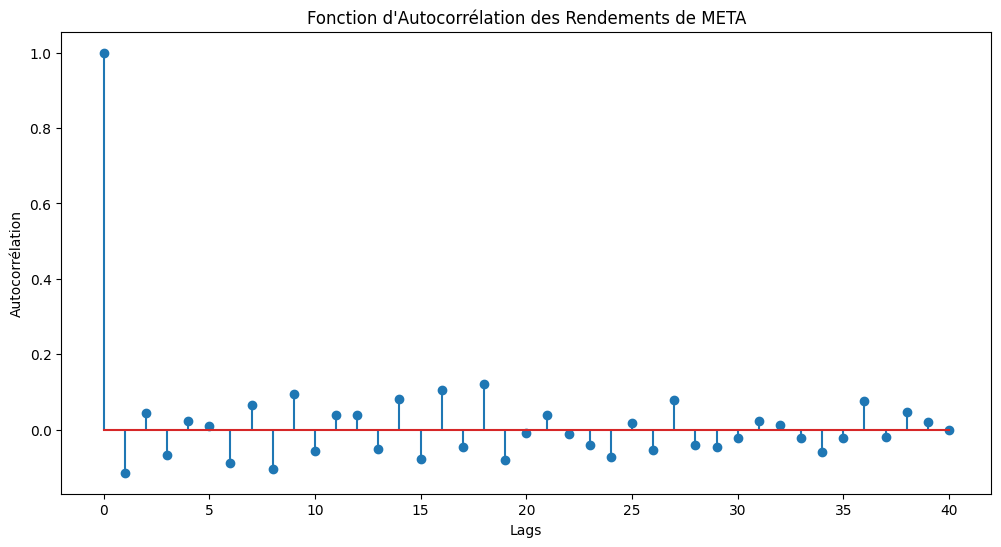

In [18]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
# Test d'autocorrélation (fonction d'autocorrélation)
# Effectuez le test d'autocorrélation sur les rendements
acf_result = sm.tsa.acf(returns, nlags=40, fft=False)

# Tracez la fonction d'autocorrélation
plt.figure(figsize=(12, 6))
plt.stem(acf_result)
plt.title("Fonction d'Autocorrélation des Rendements de META")
plt.xlabel("Lags")
plt.ylabel("Autocorrélation")
plt.show()


**Interprétation :**
je remarque que les barres restent proches de zéro pour la plupart des décalages, cela suggère une faible autocorrélation et indique que les rendements sont généralement indépendants les uns des autres.
_______________________________________________________________________________________________________________________________________________

